In [ ]:
"""
Descarga de Archivos desde Google Drive sin Autenticación

Este script permite descargar archivos específicos desde Google Drive directamente a una ubicación local,
utilizando el ID de Google Drive del archivo (el archivo debe ser accesible para cualquier persona que tenga la URL).

El script procesa un archivo de texto ('archivos_info.txt') que contiene las IDs de Google Drive de los archivos,
los nombres con los que se desean guardar localmente, y las rutas locales de almacenamiento, todo separado por comas.

Formato esperado de 'archivos_info.txt':
ID_de_Google_Drive,Nombre_Archivo_Local,Ruta_Local

Ejemplo:
1hGvKmNAkK...,mi_archivo.txt,./descargas

Requisitos:
- Módulo 'requests' instalado en el entorno Python donde se ejecute este script.



"""


import requests
import os


def descargar_archivo_directo(id_archivo, directorio_destino, archivo_destino):
    """
    Descarga un archivo directamente desde Google Drive y lo guarda localmente.

    Parámetros:
    - id_archivo (str): ID del archivo en Google Drive.
    - directorio_destino (str): Ruta del directorio local donde se guardará el archivo.
    - archivo_destino (str): Nombre deseado para el archivo en local

    Devuelve:
    - archivo_destino (str): Nombre del archivo guardado.
    - ruta_completa (str): Ruta completa del archivo guardado.
    """
    # Construye la URL de descarga directa utilizando el ID del archivo
    url = f"https://drive.google.com/uc?export=download&id={id_archivo}"

    # Realiza la petición HTTP GET para descargar el archivo
    respuesta = requests.get(url, allow_redirects=True)

    # Comprueba que el directorio destino existe, si no, lo crea
    os.makedirs(directorio_destino, exist_ok=True)

    # Construye la ruta completa donde se guardará el archivo en local
    ruta_completa = os.path.join(directorio_destino, archivo_destino)

    # Guarda el contenido del archivo descargado en local
    with open(ruta_completa, 'wb') as archivo:
        archivo.write(respuesta.content)


    return archivo_destino, ruta_completa


def procesar_archivo_info(ruta_archivo_info):
    """
    Procesa un archivo de texto que contiene información sobre los archivos a descargar.

    Parámetros:
    - ruta_archivo_info (str): Ruta del archivo de texto que contiene los IDs de Google Drive,
                               los nombres de los archivos locales y las rutas locales.

    Devuelve:
    - Una lista de tuplas con el ID de Google Drive, el nombre local del archivo, y la ruta local.
    """
    archivos_info = []
    with open(ruta_archivo_info, 'r') as archivo:
        for linea in archivo:
            id_archivo, nombre_archivo, directorio_destino = linea.strip().split(',')
            archivos_info.append((id_archivo, nombre_archivo, directorio_destino))
    return archivos_info


## Ejemplo de uso

# Ruta al archivo que contiene la información de los archivos a descargar
ruta_archivo_info = "info_archivos_GDrive.txt"

# Obtenemos la lista con la info de los archivos del fichero
archivos_a_descargar = procesar_archivo_info(ruta_archivo_info)

# Descargamos cada archivo de la lista
for id_archivo, nombre_archivo, directorio_destino in archivos_a_descargar:
    nombre_archivo_descargado, ruta_archivo_guardado = descargar_archivo_directo(id_archivo, directorio_destino, nombre_archivo)
    print(f"Archivo {nombre_archivo_descargado} guardado en: {ruta_archivo_guardado}")


,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Tackles,...,marketValue,Año_natural,Titularidades,Suplencias,Equipo_pos,1_año_anterior,2_año_anterior,3_año_anterior,4_año_anterior,5_año_anterior
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,...,2.267000e+03,2267.000000,2267.000000,2267.000000,2267.000000,2.267000e+03,2.267000e+03,2.267000e+03,2.267000e+03,2.267000e+03
mean,1278.961182,1.606528,1.091751,3.073666,0.167622,0.637097,76.188355,0.943935,0.649316,0.883414,...,8.728672e+06,2020.518747,14.266873,5.426114,10.697397,8.734782e+06,7.517711e+06,5.845258e+06,4.469740e+06,9.814722e+06
std,971.453864,3.022059,1.815025,2.956637,0.429651,0.621756,13.299945,0.960087,1.402967,0.693195,...,1.365363e+07,1.111989,11.266285,5.233994,5.813231,1.662477e+07,1.568409e+07,1.335073e+07,1.103684e+07,1.687566e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000e+04,2019.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,365.500000,0.000000,0.000000,1.000000,0.000000,0.200000,71.000000,0.300000,0.000000,0.400000,...,1.500000e+06,2020.000000,3.000000,1.000000,6.000000,5.000000e+05,2.500000e+05,0.000000e+00,0.000000e+00,1.000000e+06
50%,1164.000000,0.000000,0.000000,2.000000,0.000000,0.500000,78.400000,0.700000,0.000000,0.800000,...,3.200000e+06,2021.000000,13.000000,4.000000,11.000000,2.400000e+06,1.500000e+06,8.000000e+05,4.000000e+05,3.000000e+06
75%,2050.500000,2.000000,2.000000,5.000000,0.000000,0.900000,84.300000,1.300000,1.000000,1.300000,...,9.750000e+06,2022.000000,23.000000,8.000000,16.000000,9.500000e+06,7.500000e+06,5.000000e+06,3.000000e+06,1.000000e+07
max,3420.000000,30.000000,21.000000,15.000000,3.000000,5.600000,100.000000,8.700000,22.000000,6.000000,...,1.120000e+08,2022.000000,38.000000,29.000000,20.000000,1.800000e+08,1.500000e+08,1.200000e+08,1.200000e+08,1.800000e+08


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


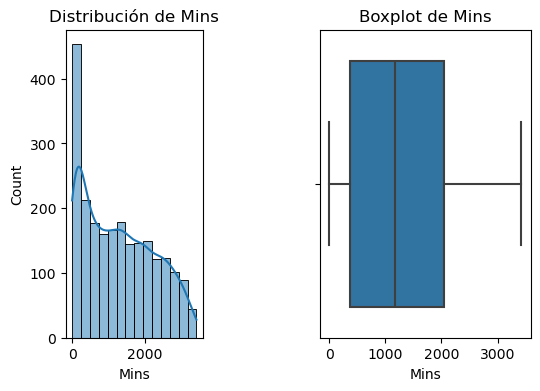

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


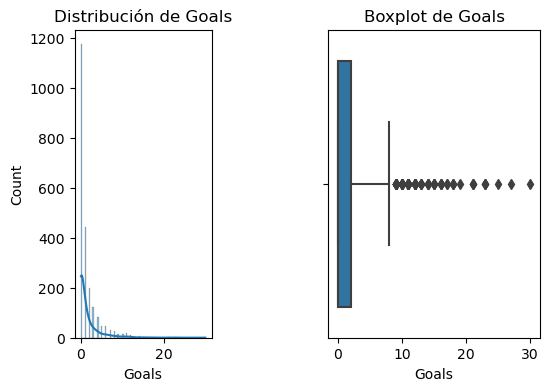

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


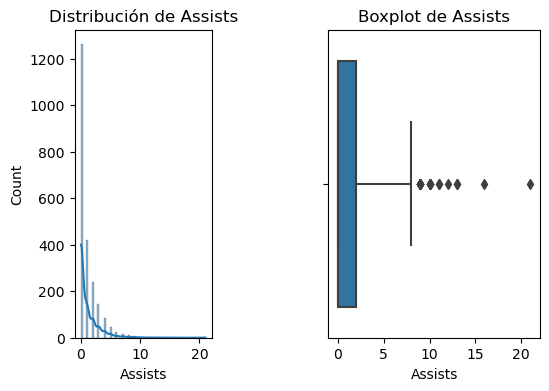

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


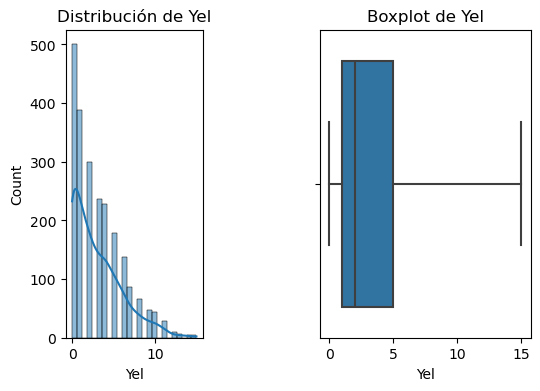

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


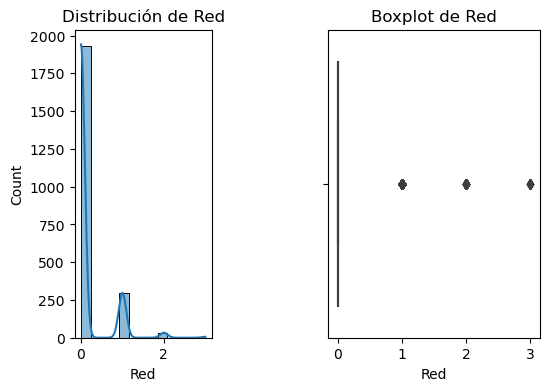

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


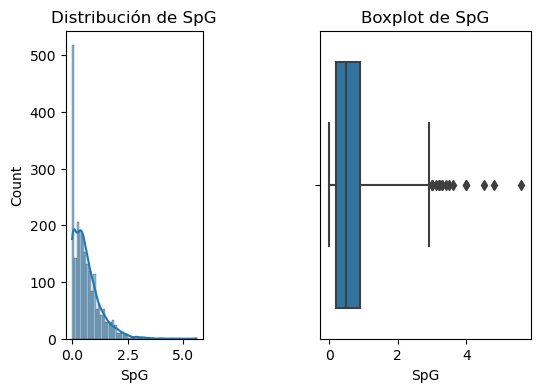

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


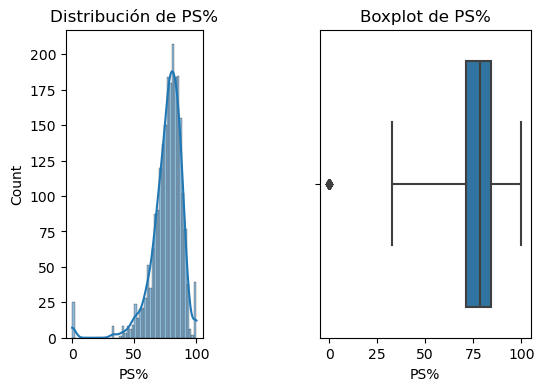

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


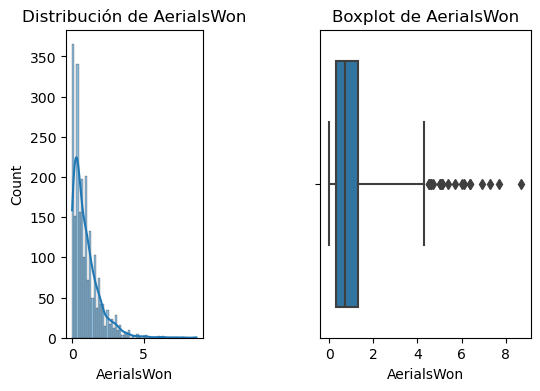

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


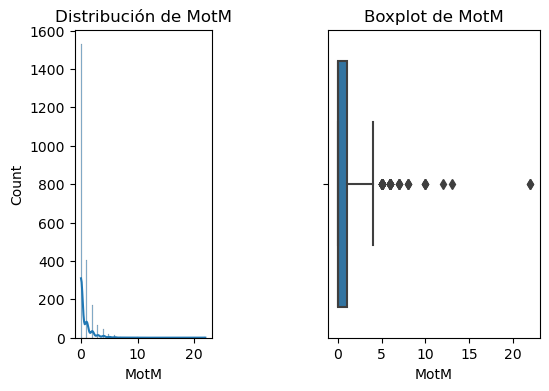

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


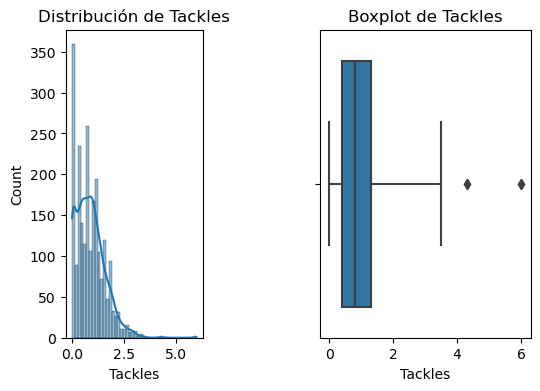

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


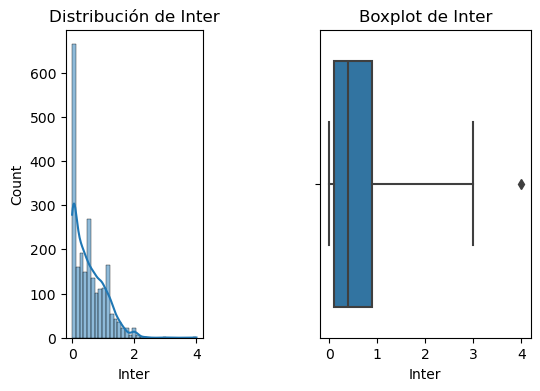

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


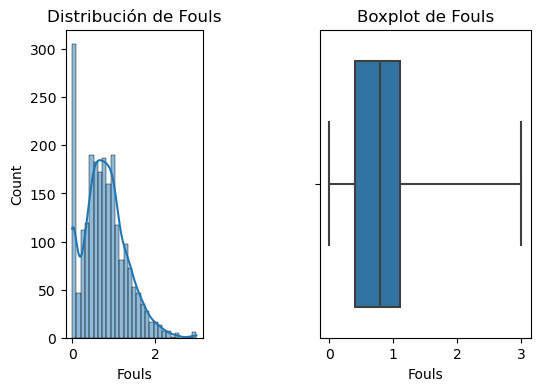

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


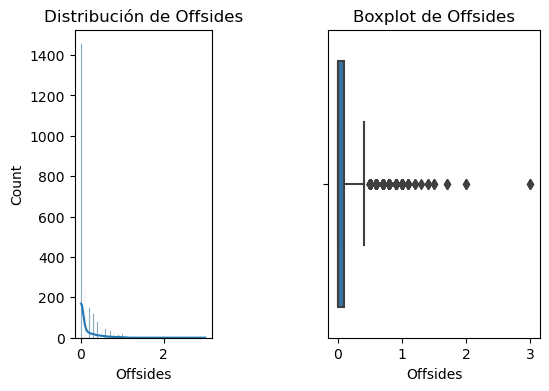

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


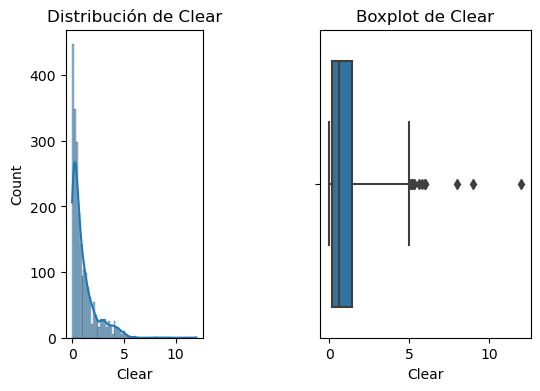

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


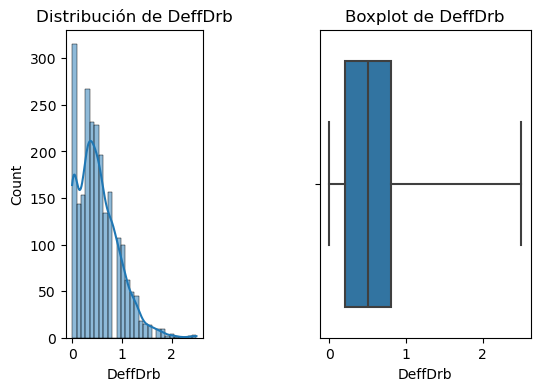

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


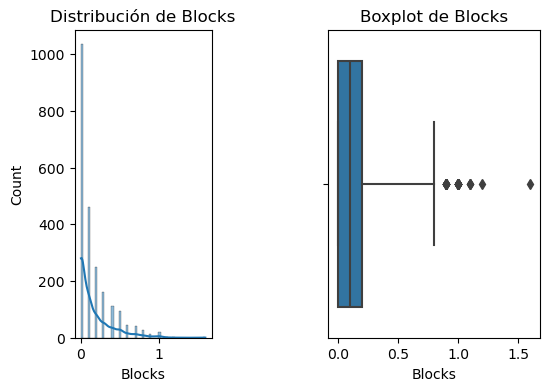

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


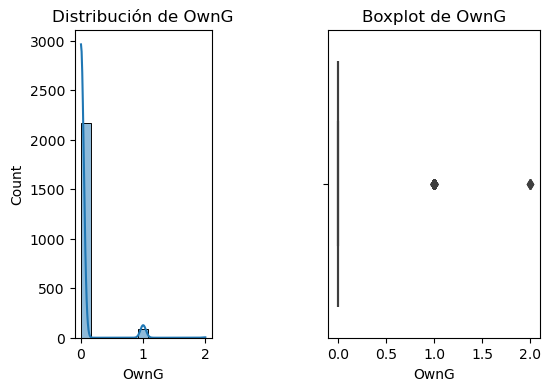

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


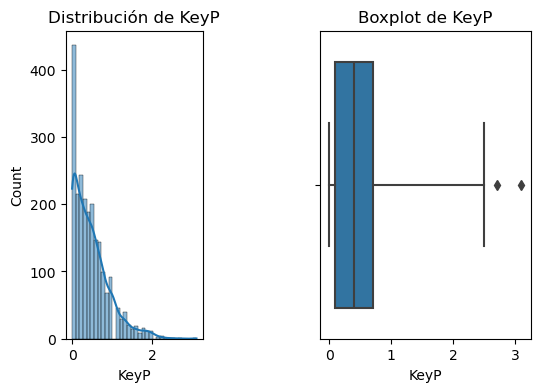

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


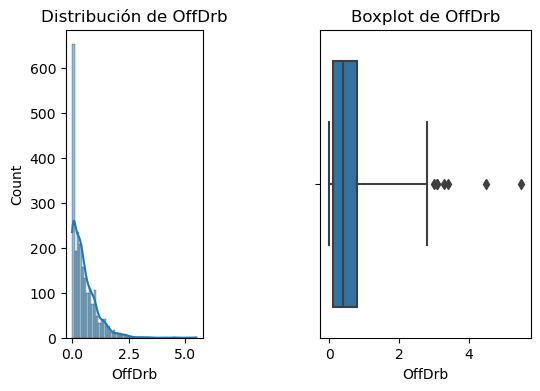

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


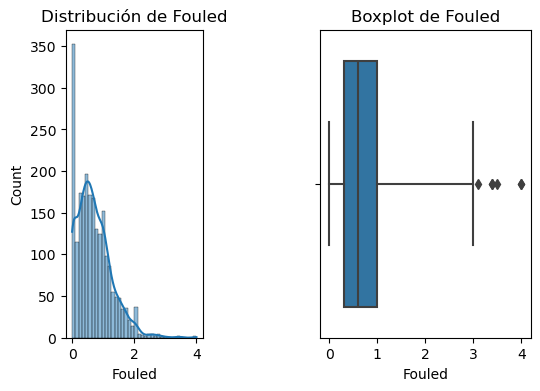

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


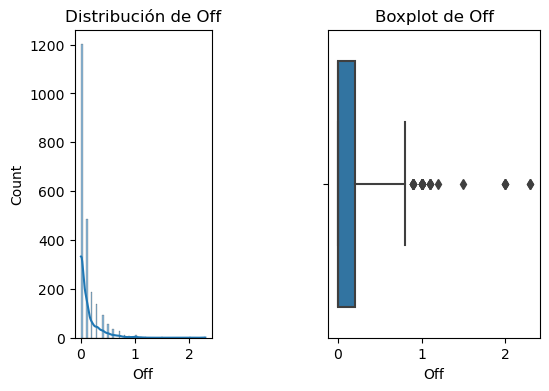

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


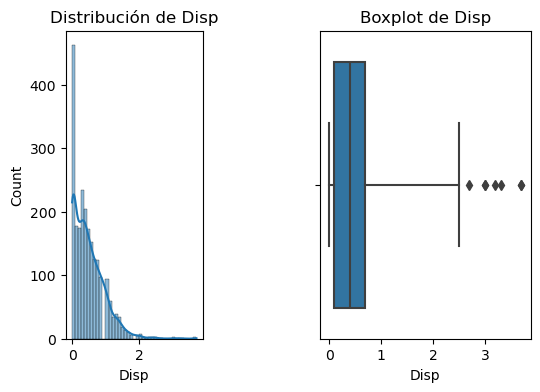

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


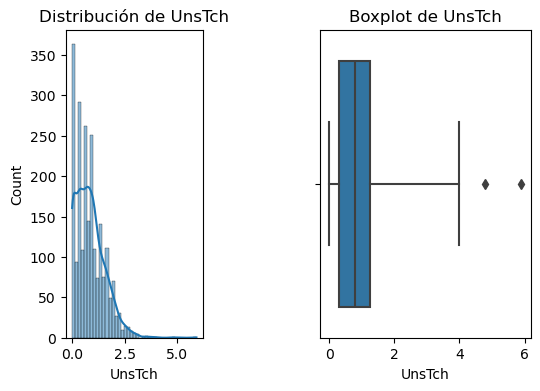

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


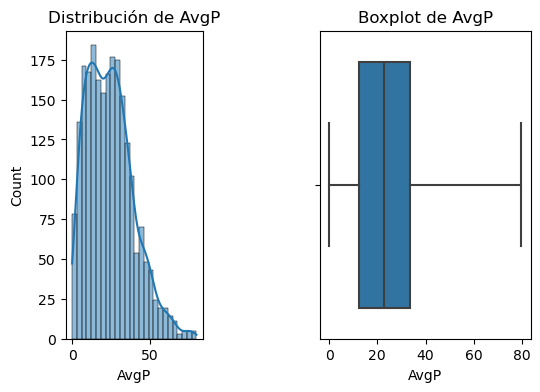

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


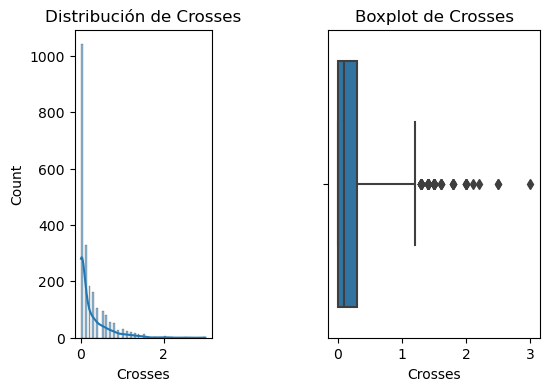

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


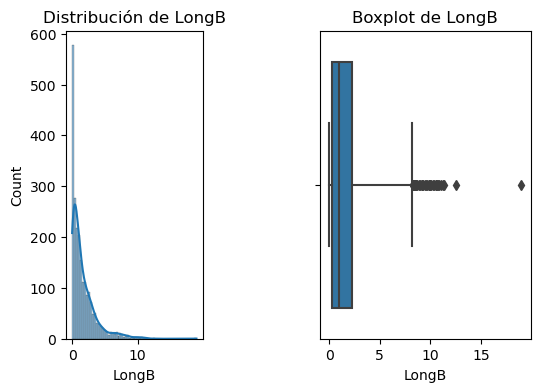

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


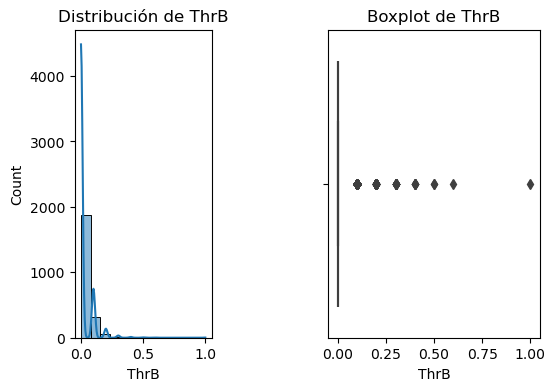

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


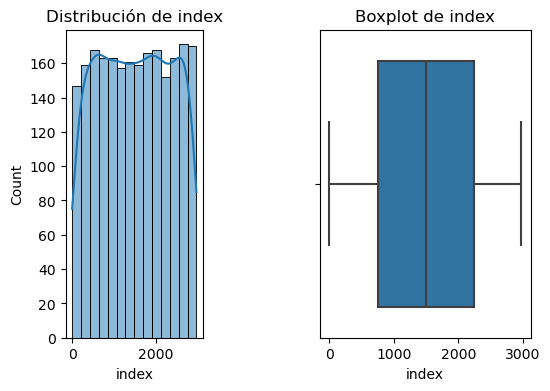

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


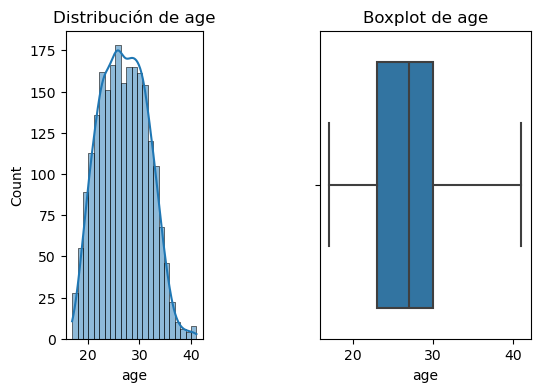

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


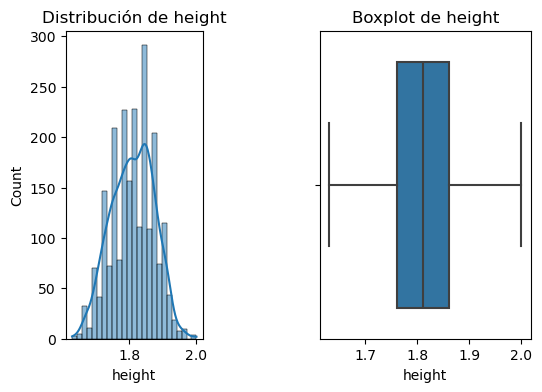

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


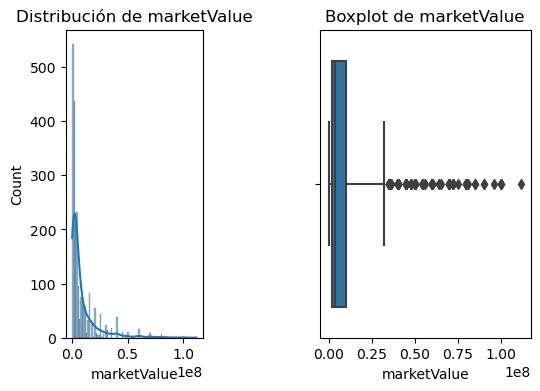

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


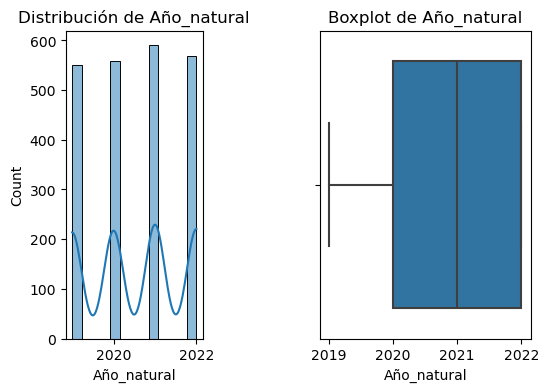

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


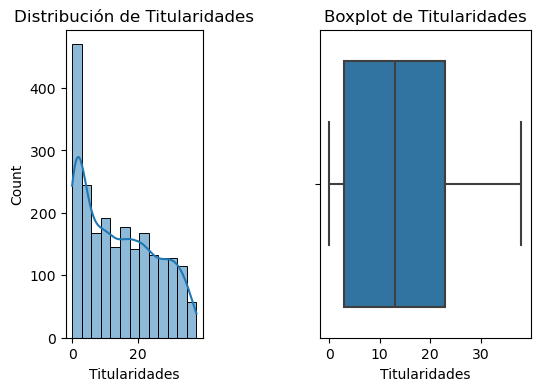

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


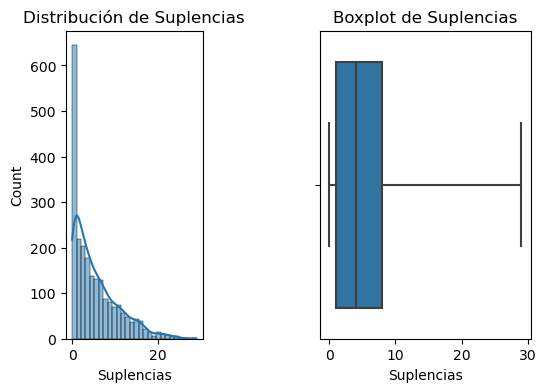

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


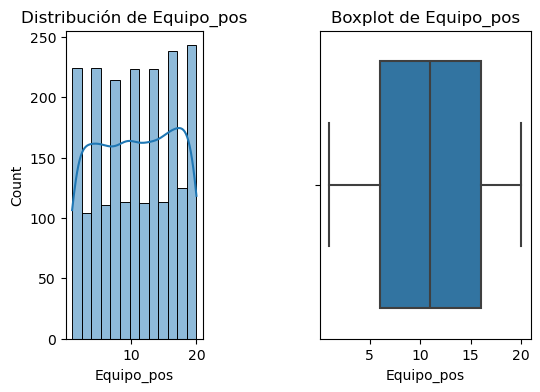

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


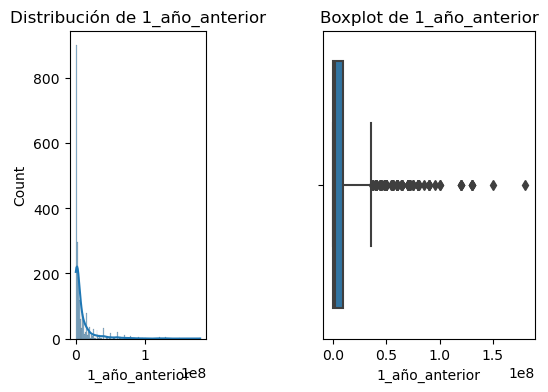

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


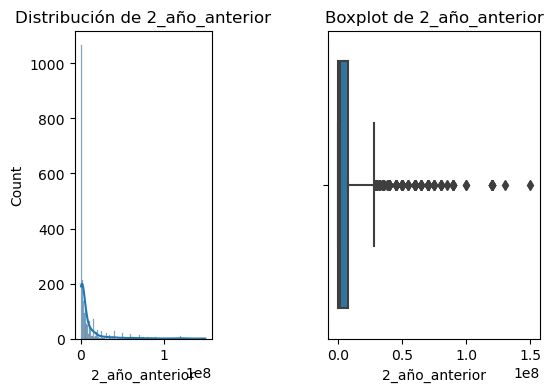

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


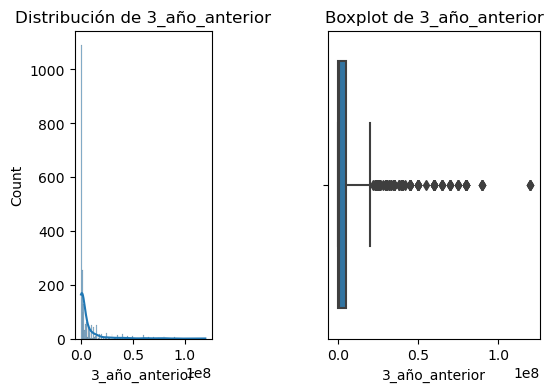

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


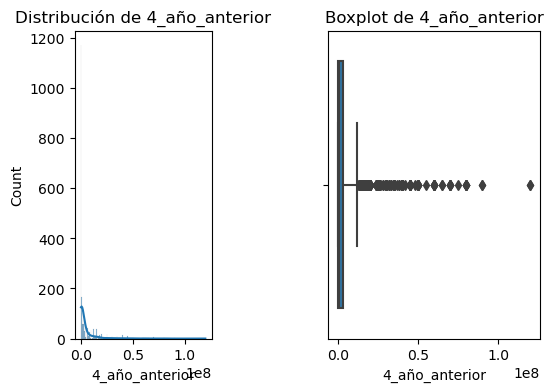

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


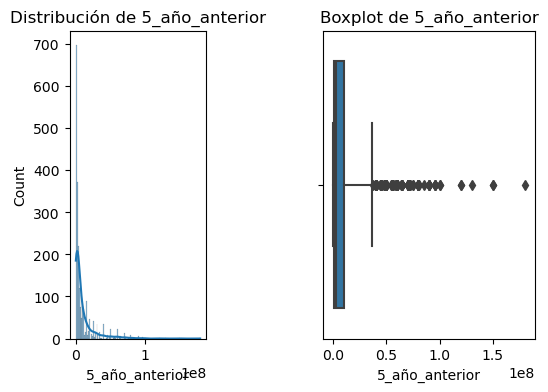

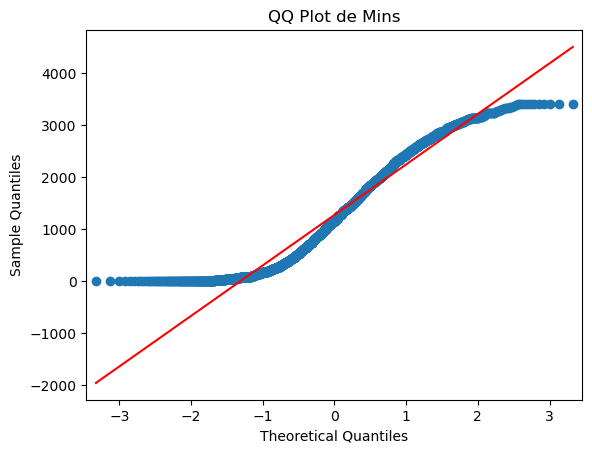

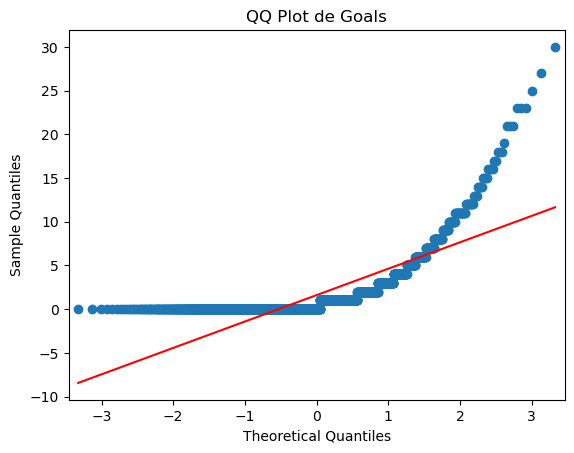

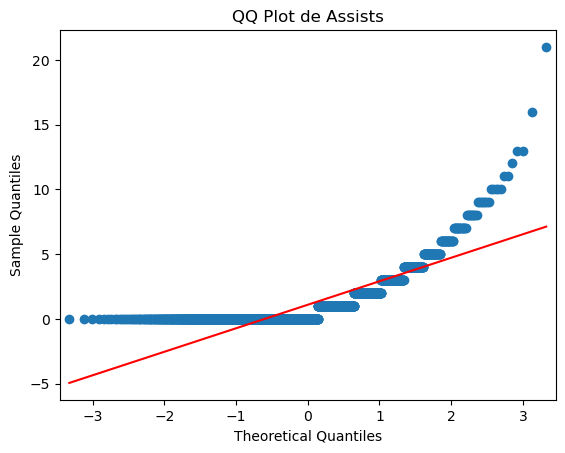

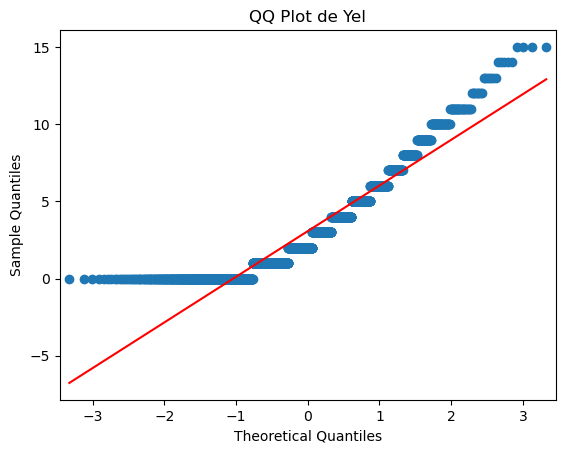

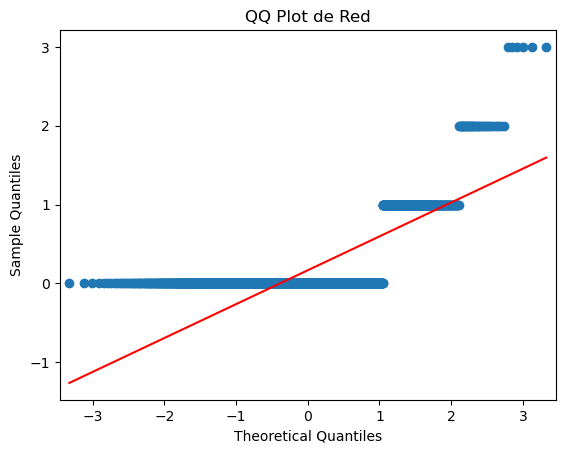

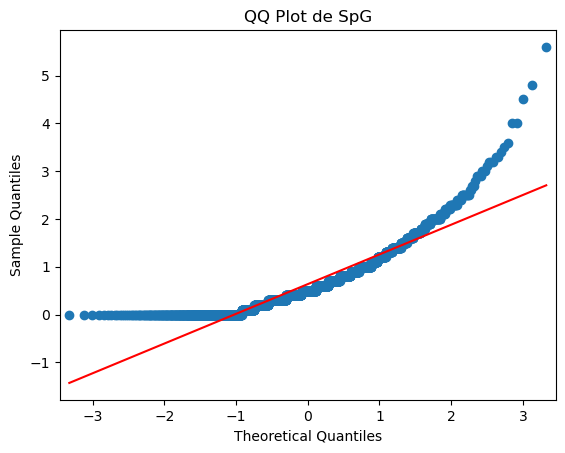

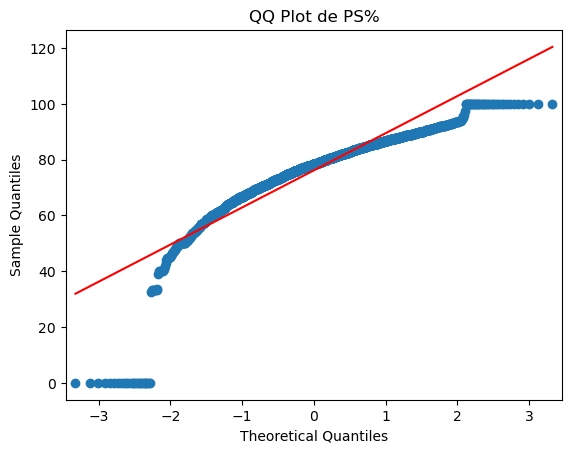

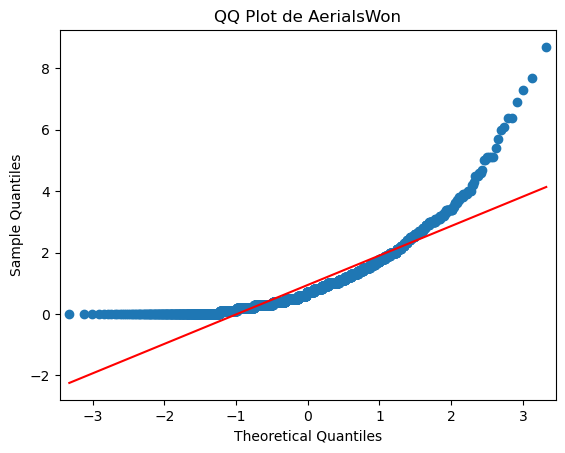

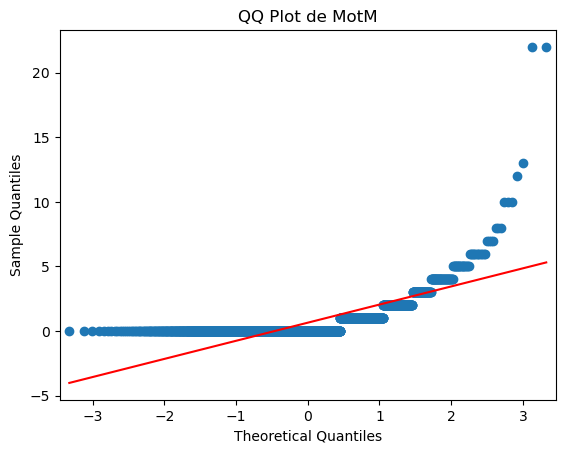

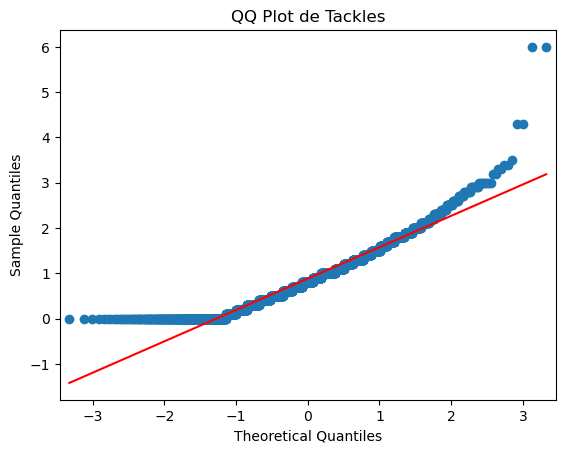

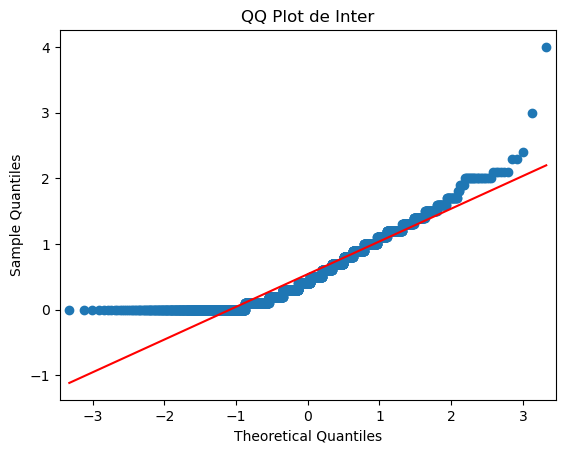

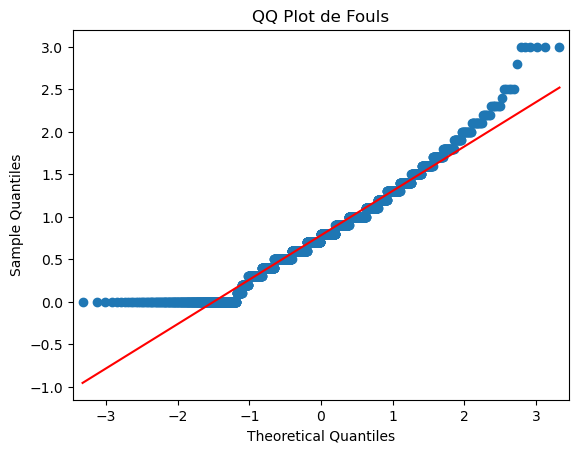

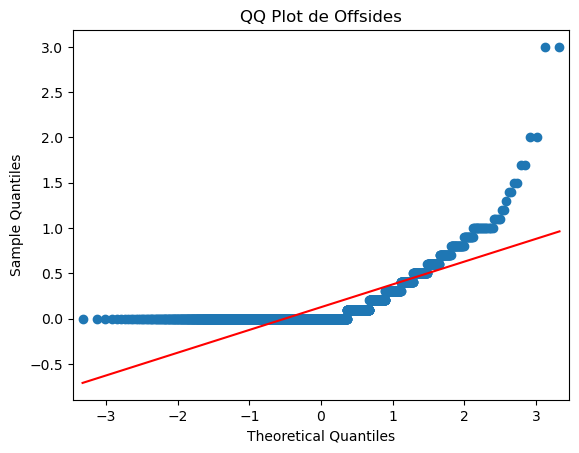

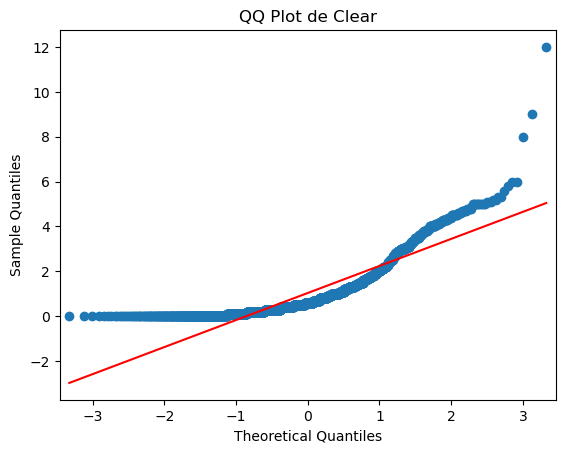

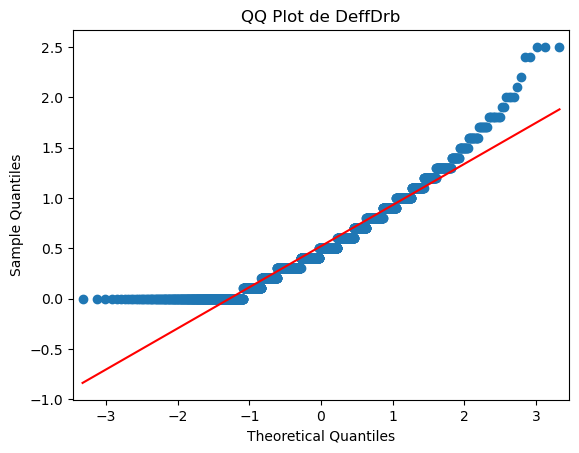

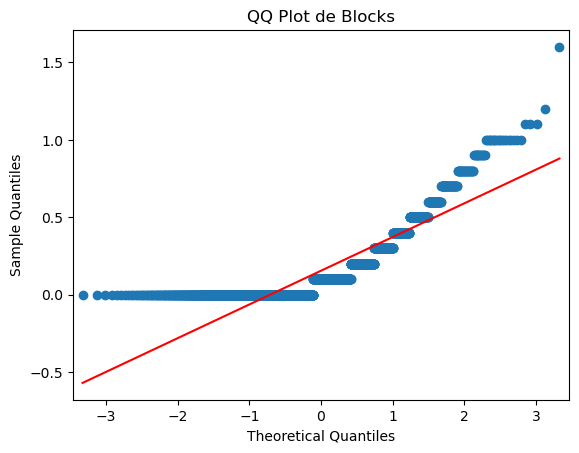

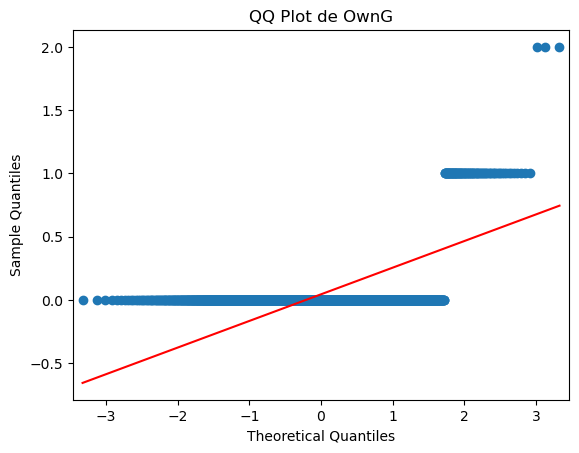

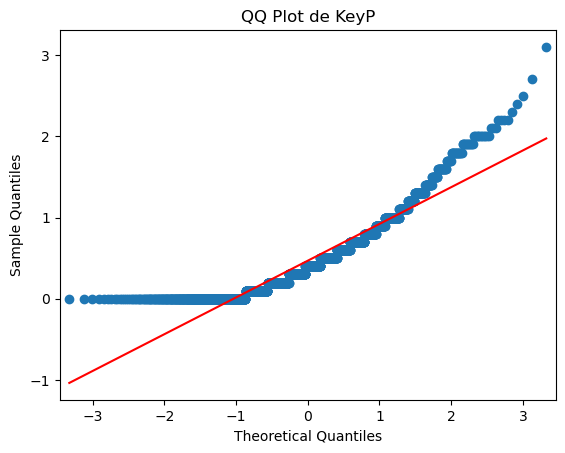

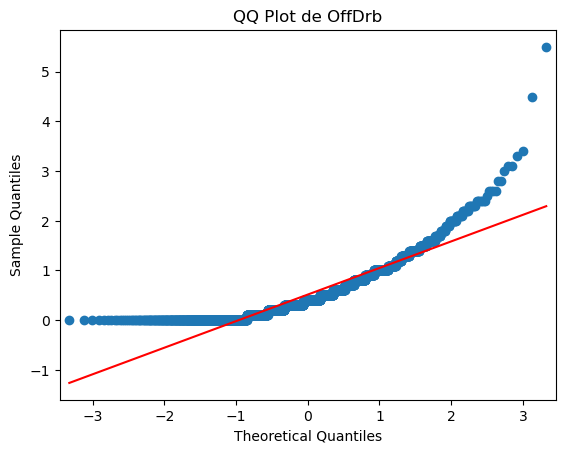

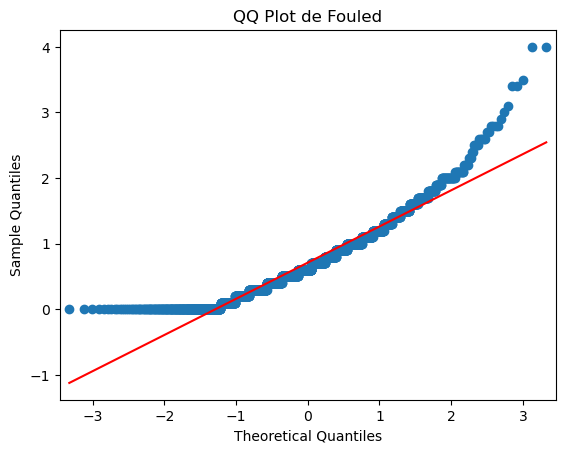

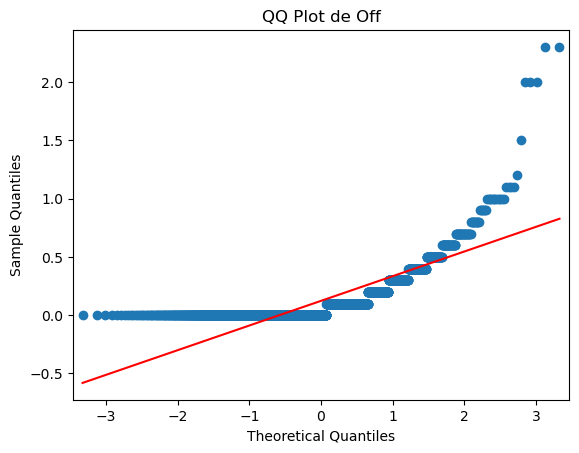

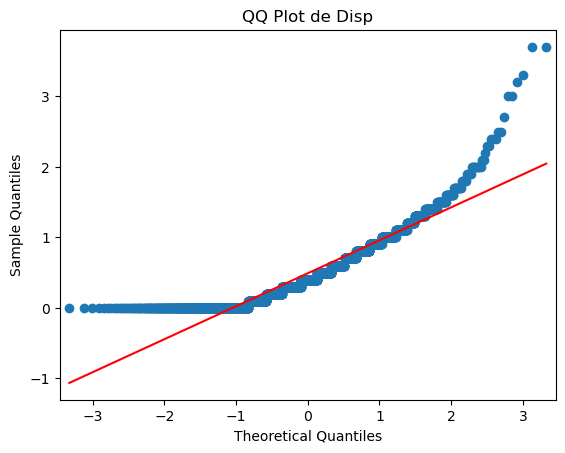

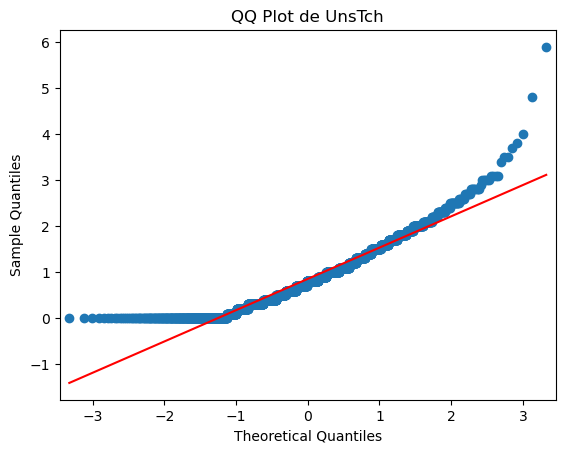

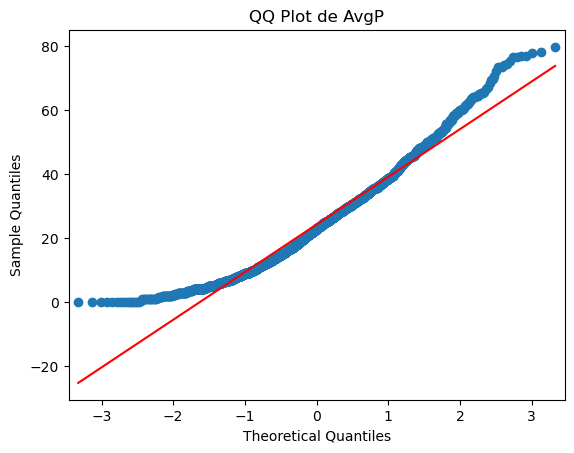

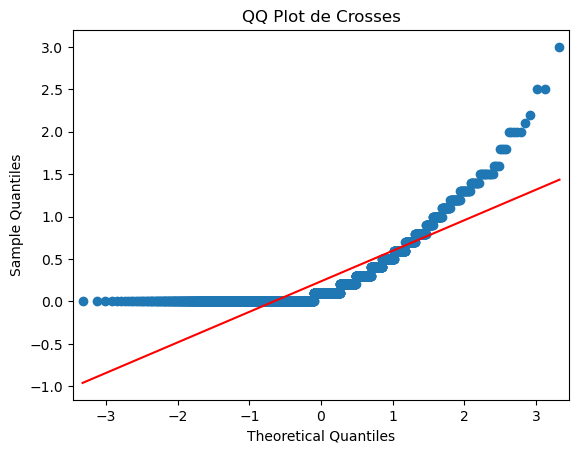

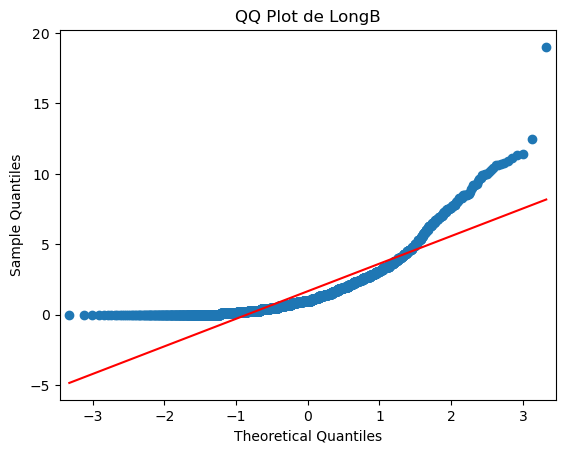

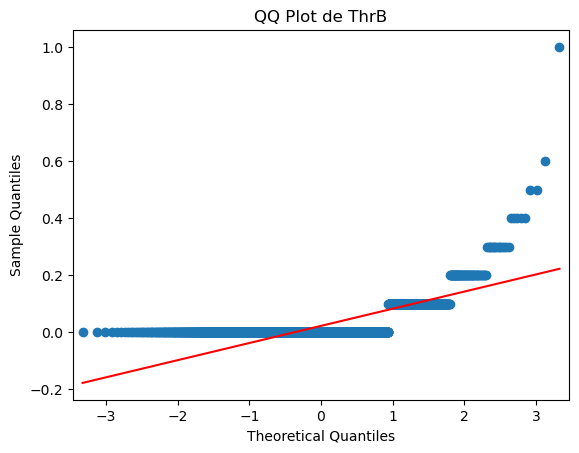

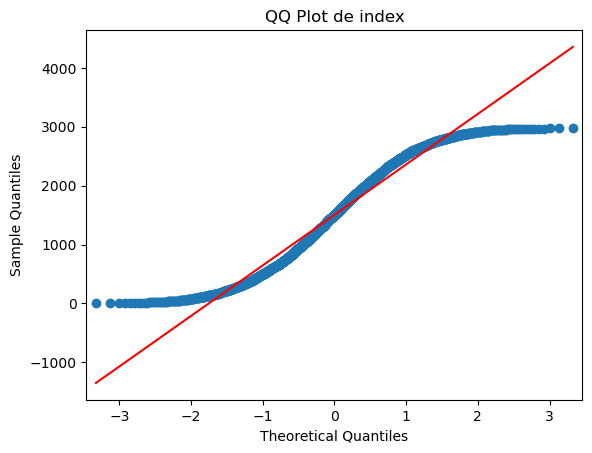

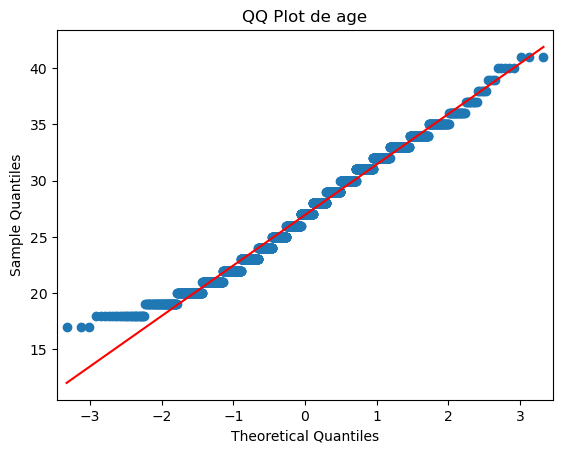

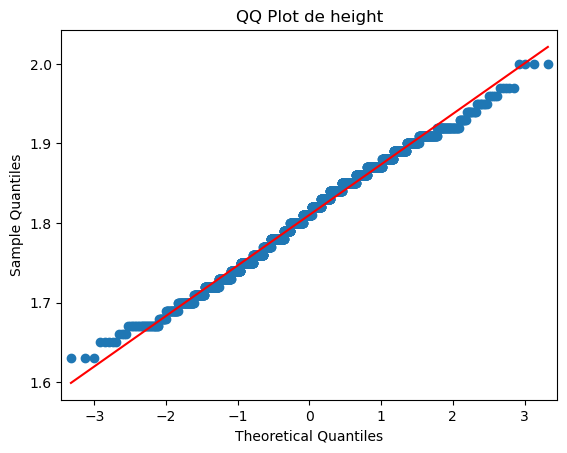

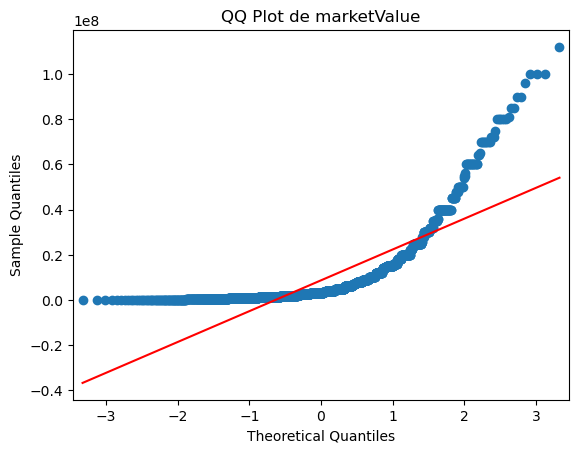

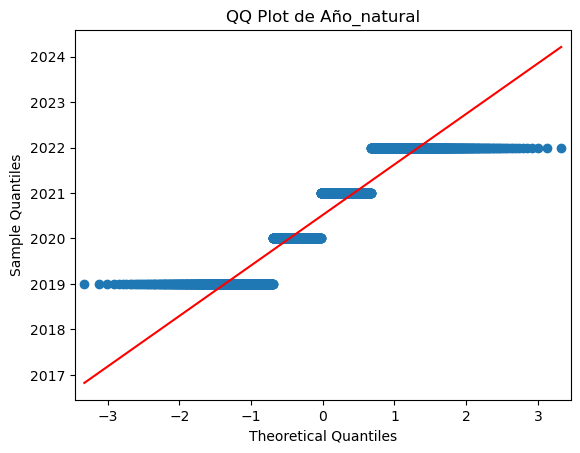

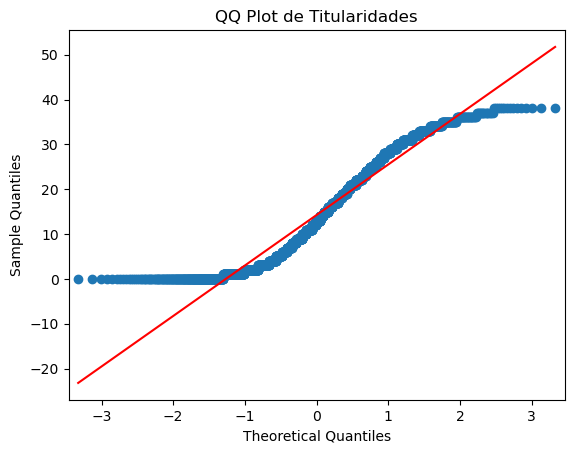

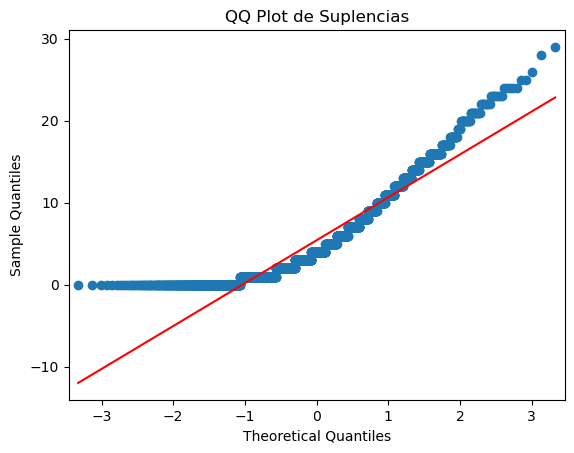

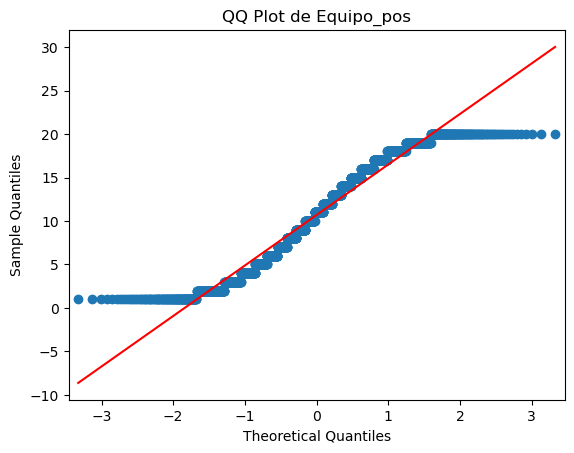

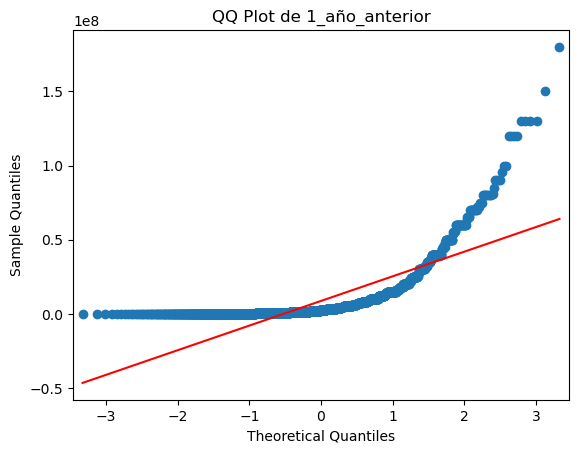

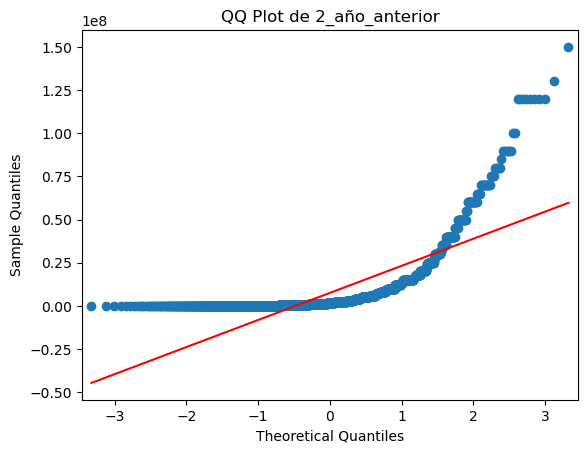

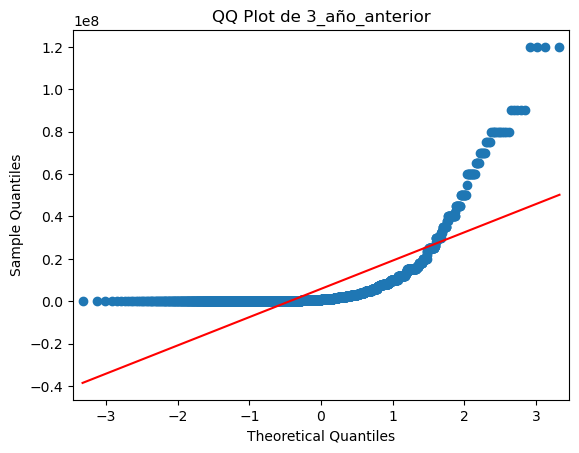

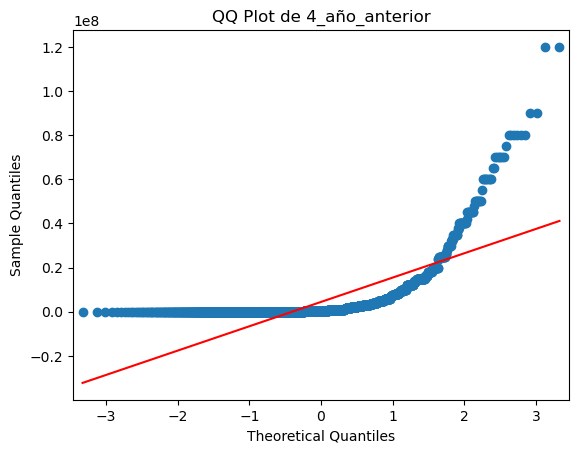

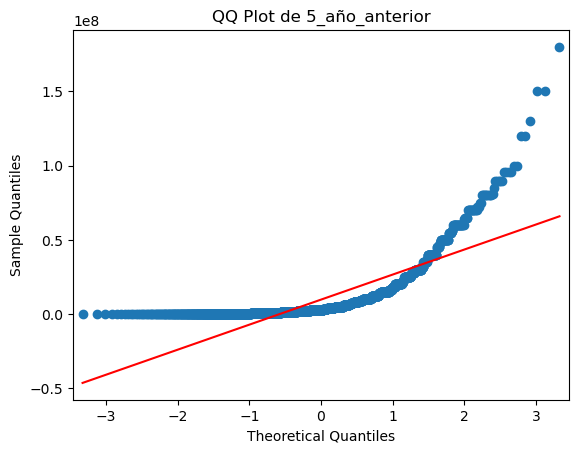

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew, kurtosis, shapiro
df = pd.read_parquet(ruta_archivo_guardado)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number])
# Análisis Descriptivo
descriptive_stats = df.describe()
display(descriptive_stats)

# Visualización de la Distribución y Boxplot para cada variable
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    
    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], whis=3)
    plt.title(f'Boxplot de {col}')
    plt.show()

# Normalidad (QQ Plot) para cada variable
for col in numeric_cols.columns:
    sm.qqplot(df[col], line='s')
    plt.title(f'QQ Plot de {col}')
    plt.show()
    
# Tests de Shapiro para normalidad
for col in numeric_cols.columns:
    stat, p_value = shapiro(df[col])
    if p_value > 0.05:
        print(f'{col} parece seguir una distribución normal\n')

In [ ]:
# Matriz de Correlación (Heatmap) mejorado
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Matriz de Correlación')
plt.show()
# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()
# Filtrar correlaciones que superan el 70% en valor absoluto
threshold = 0.7
high_correlations = correlation_matrix[((correlation_matrix > threshold) & (correlation_matrix < 1)) | ((correlation_matrix < -threshold) & (correlation_matrix > -1))]
high_correlations

In [ ]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(numeric_cols["SpG"], numeric_cols["Goals"])

# Imprimir los resultados
print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"Valor p: {p_value}")
corr, p_value = spearmanr(numeric_cols["KeyP"], numeric_cols["Assists"])

# Imprimir los resultados
print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"Valor p: {p_value}")


corr, p_value = spearmanr(numeric_cols["equipo_2020"], numeric_cols["equipo_2021"])

# Imprimir los resultados
print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"Valor p: {p_value}")
#todos son significativos

In [ ]:
#pip install pingouin